# Análisis Exploratorio de Datos (EDA): Clasificador de Reseñas IMDB

Este notebook realiza un análisis exploratorio sobre el conjunto de datos de reseñas de películas IMDB, compuesto por 50.000 ejemplos equilibrados entre sentimientos positivos y negativos. El objetivo es entender la estructura, distribución y características del texto, así como detectar posibles problemas de calidad en los datos antes de entrenar un modelo de machine learning para análisis de sentimiento.

---

## Objetivos del EDA
- Explorar la longitud y estructura del texto.
- Visualizar la distribución de clases y métricas básicas.
- Identificar las palabras más frecuentes mediante nubes de palabras (en esta sección se incluye la limpieza de los datos).

Importamos las librerias necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Verificación de la calidad del dataset

Antes de analizar el contenido de las reseñas, es importante evaluar la calidad del dataset: si hay valores nulos, duplicados o un desbalance de clases que pueda afectar al modelo.

Cargamos el dataset

In [84]:
df_reviews = pd.read_csv("../data/IMDB_reviews.csv")
df_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Inspeccionamos estructura, valores nulos y duplicados

In [85]:
df_reviews.info() #no hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [86]:
df_reviews.duplicated().sum #no hay duplicados

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool>

Veamos si las clases están balanceadas

C:\Users\angel\AppData\Local\Temp\ipykernel_29140\908321934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values,  palette="Set2")


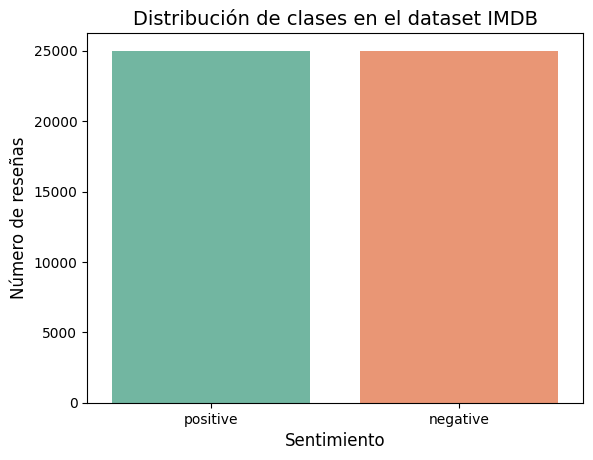

In [87]:
# Conteo de clases
conteo = df_reviews['sentiment'].value_counts()

# Gráfico de barras
sns.barplot(x=conteo.index, y=conteo.values,  palette="Set2")

plt.title("Distribución de clases en el dataset IMDB", fontsize=14)
plt.xlabel("Sentimiento", fontsize=12)
plt.ylabel("Número de reseñas", fontsize=12)
plt.show()

## 2. Análisis de la longitud y estructura del texto

En esta sección exploramos la longitud de las reseñas para entender la estructura general del texto. Esto nos ayuda a:

- Detectar outliers (reseñas extremadamente largas o cortas).
- Ver si la longitud influye en el sentimiento.
- Tomar decisiones sobre si recortar o normalizar textos más adelante.

Vamos a calcular la longitud de cada reseña, visualizar su distribución general y compararla entre reseñas positivas y negativas.

Añadimos una columna de longitud de las reseñas en caracteres y visualizamos las longitudes:

Text(0, 0.5, 'Longitud de las reseñas')

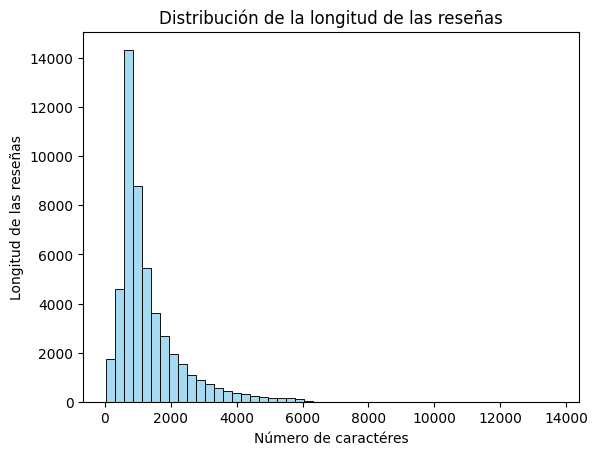

In [88]:
df_reviews['review_length'] = df_reviews['review'].apply(len)

sns.histplot(df_reviews['review_length'], bins=50, color='skyblue')
plt.title("Distribución de la longitud de las reseñas")
plt.xlabel("Número de caractéres")
plt.ylabel("Longitud de las reseñas")

Comparamos lalongitud según el sentimiento:

C:\Users\angel\AppData\Local\Temp\ipykernel_29140\3168805049.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_reviews, x = df_reviews['sentiment'], y = df_reviews['review_length'], palette='Set2')


Text(0, 0.5, 'Longitud (nº de caracteres)')

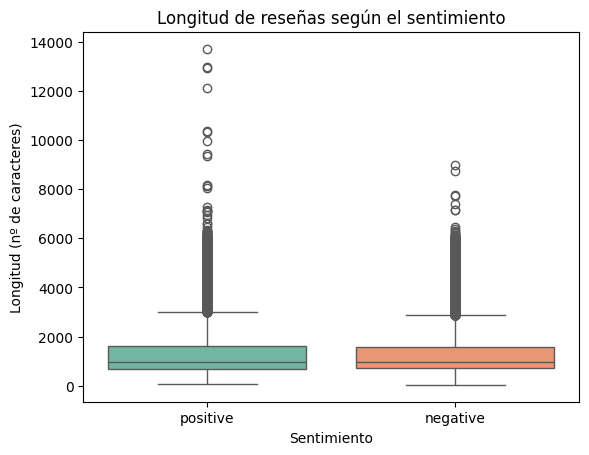

In [89]:
sns.boxplot(data = df_reviews, x = df_reviews['sentiment'], y = df_reviews['review_length'], palette='Set2')
plt.title('Longitud de reseñas según el sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Longitud (nº de caracteres)')

La mayoria de reseñas para ambos sentimientos tienen menos de 3000 caracteres, siendo común la presencia de reseñas de hasta 6000. Aunque observamos algunas reseñas muy extensas, no se consideran problemáticos en esta fase. Dado que usamos modelos basados en TF-IDF, los vectores generados estarán normalizados, lo que minimiza el impacto de textos excesivamente largos. Por tanto, no aplicamos ninguna eliminación ni truncado por el momento.

## 3. Análisis léxico y nubes de palabras

En esta sección analizamos el vocabulario más frecuente en las reseñas mediante conteo de palabras y nubes de palabras. Esto nos permite:

- Identificar patrones en el lenguaje según el sentimiento.
- Entender qué tipo de palabras aparecen en reseñas positivas o negativas.
- Preparar el camino para aplicar modelos de NLP más adelante.

Vamos a:
- Limpiar el texto.
- Tokenizar las reseñas.
- Eliminar stopwords.
- Generar nubes de palabras por clase.

In [90]:
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re

# Descargar stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para limpiar texto
def limpiar_texto(texto):
    texto = texto.lower()                                # a minúsculas
    texto = re.sub(r'<.*?>', '', texto)                  # eliminar HTML
    texto = re.sub(r'[^a-z\s]', '', texto)               # dejar solo letras y espacios
    palabras = texto.split()
    palabras = [p for p in palabras if p not in stop_words]  # quitar stopwords
    return ' '.join(palabras)

# Aplicamos la limpieza a todo el dataset
df_reviews['review_clean'] = df_reviews['review'].apply(limpiar_texto)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ejemplo de reseña original vs limpia

In [91]:
df_reviews[['review','review_clean']].head(3)

,review,review_clean
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...


Nube de palabras con todas las reseñas

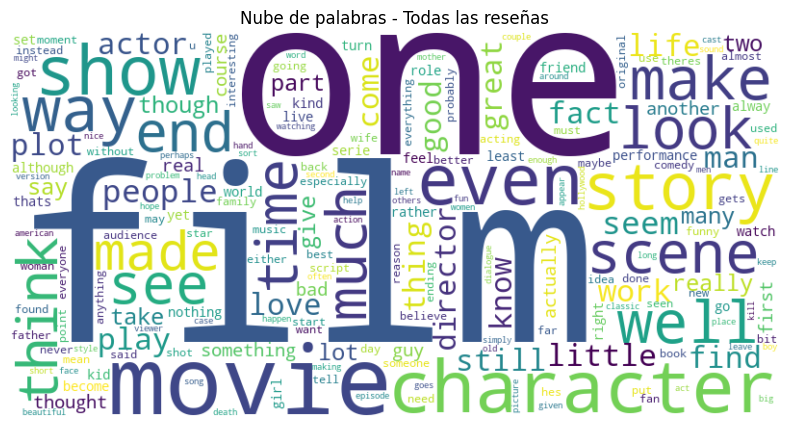

In [92]:
# Unimos todo el texto
texto_total = ' '.join(df_reviews['review_clean'])

# Creamos la nube
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_total)

# Mostramos
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Todas las reseñas')
plt.show()


Nubes de palabras por clases

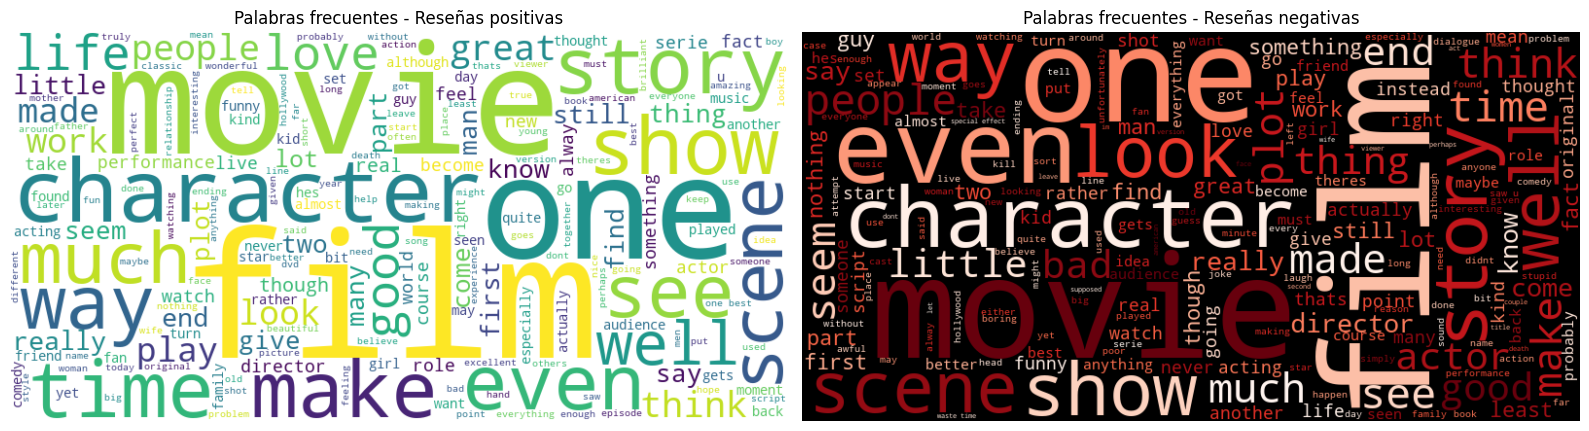

In [93]:
# Texto separado por clase
positivo = ' '.join(df_reviews[df_reviews['sentiment'] == 'positive']['review_clean'])
negativo = ' '.join(df_reviews[df_reviews['sentiment'] == 'negative']['review_clean'])

# Generar nubes
wc_pos = WordCloud(width=800, height=400, background_color='white').generate(positivo)
wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negativo)

# Mostrar ambas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].imshow(wc_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Palabras frecuentes - Reseñas positivas')

axes[1].imshow(wc_neg, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Palabras frecuentes - Reseñas negativas')

plt.tight_layout()
plt.show()

Guardamos el df limpio

In [94]:
df_limpio = df_reviews[['review_clean', 'sentiment']]
df_limpio.to_csv('../data/IMDB_reviews_clean.csv', index=False)

---

## Conclusiones del EDA

- El dataset está limpio, balanceado y sin nulos ni duplicados.
- Las reseñas tienen una longitud media razonable, con algunos outliers que no afectan el modelado.
- El vocabulario muestra patrones claros entre clases, lo que será útil para construir un clasificador.

En el siguiente notebook realizaremos la limpieza final, la vectorización del texto mediante TF-IDF y entrenaremos un modelo de clasificación.
